In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [3]:
# Step 2 Provide the GitHub raw URL of your CSV file
github_url = 'https://raw.githubusercontent.com/Thathmi90/MOLBIO-550_Project2/refs/heads/main/Global%20difference_data%20for%20PCA%20plot.csv'

# Step 3 Read the sheet with replicates (Sheet1)
# If your sheet name differs, change 'Sheet1' or use sheet index (e.g., sheet_name=1)
df = pd.read_csv(github_url)

In [4]:
# STEP 3: Load data
# file_name = list(uploaded.keys())[0]
# df = pd.read_excel(file_name, sheet_name='Sheet1')

In [5]:
#  Step 4: Show the first few rows
print(df.head())

        Gene       WT_1       WT_2       WT_3     hnox_1     hnox_2     hnox_3
0  Pden_0001  15.257661  15.466992  15.106084  15.163709  15.350200  15.330972
1        rho  19.323959  19.185708  19.439069  18.638041  18.898438  18.546545
2       mnmE  17.310870  17.453550  17.548070  17.745923  17.844168  17.708122
3       mnmG  20.292848  20.373691  20.448830  20.301087  20.528667  20.162374
4       rsmG  19.390807  19.493019  19.472492  19.444374  19.413354  19.539371


In [6]:
# STEP 4: Define numeric columns explicitly
numeric_columns = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

In [7]:
df.dropna(inplace = True)
print(df.shape)

(2678, 7)


In [10]:
df


,Gene,WT_1,WT_2,WT_3,hnox_1,hnox_2,hnox_3
0,Pden_0001,15.257661,15.466992,15.106084,15.163709,15.350200,15.330972
1,rho,19.323959,19.185708,19.439069,18.638041,18.898438,18.546545
2,mnmE,17.310870,17.453550,17.548070,17.745923,17.844168,17.708122
3,mnmG,20.292848,20.373691,20.448830,20.301087,20.528667,20.162374
4,rsmG,19.390807,19.493019,19.472492,19.444374,19.413354,19.539371
...,...,...,...,...,...,...,...
2689,hisC,21.932862,21.955808,21.977513,21.873847,21.928867,21.708511
2690,nirS,23.413530,23.395265,23.523621,23.368957,23.312429,23.457762
2691,nirE,17.342587,17.560408,17.546640,16.962248,16.434074,16.883742
2692,nirDL,13.411288,13.616887,13.884577,13.656872,13.329556,13.225657


In [12]:
# STEP 5: Transpose the data (rows = samples, columns = genes)
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene']  # Optional: set gene names as column headers

In [13]:
# STEP 6: Create labels
labels = ['WT'] * 3 + ['Δhnox'] * 3

In [14]:

# STEP 7: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data)

In [15]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [16]:
# Sample names corresponding to the transposed rows
sample_names = ['WT_1', 'WT_2','WT_3', 'hnox_1', 'hnox_2','hnox_3']

In [26]:
# Define new color map
color_map = {'WT': '#c9a31a', 'Δhnox': '#c91ac0'}  # yellow and pink

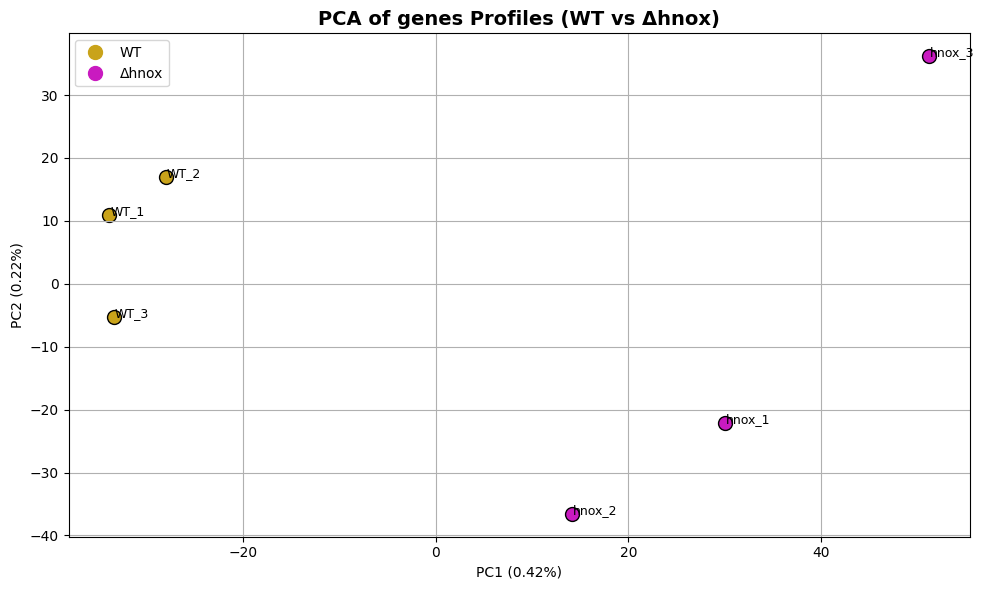

In [28]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (WT vs Δhnox)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_genes_p den.png'
pdf_path = 'PCA_genes.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()